## Problem statement
Day 8's problem is about connecting the closest locations in terms of cartesian distance. Since the problem is quite descriptive in connecting boxes, graphs are a natural data structure to be used for the puzzle.


### Sample input
---
For the sample input they ask us to connect the 10 closest boxes together given the following instructions:
- Boxes should be connected in the order of closest distance
- A circuit is a unique set of connected boxes (circuits of 1 box are also possible)

The solution to the puzzle is the product of the three largest distinct circuit sizes

In [12]:
def data_reader(s: str) -> list:
    with open(s, 'r') as f:
        lines = f.read().splitlines()
    
    lines = [line.split(',') for line in lines]
    for i in range(len(lines)):
        for j in range(len(lines[i])):
            lines[i][j] = int(lines[i][j])
            
        #We will store then as node toples (node_id, co-ordinates)
        lines[i] = (i, {'cords': lines[i], 'circuit': {i}})

    return lines

lines1 = data_reader('sample_input.txt')
lines2 = data_reader('puzzle_input.txt')

To solve this problem we will use networkx, a library that allows for easy graph creation with standard functionalities like creating nodes, adding edges and checking adjacent edges. The use in this solution is quite limited but it saves us from having to implement these functionalities ourselves.

In [3]:
import networkx as nx
import numpy as np

We will create some helper functions to help us do this.

1. One to compute the cartesian distance
2. One to check if we're already in a circuit, this prevents further edges of boxes in an circuit already
3. If a connection is made, we need an update function that tells the nodes (and all nodes within its circuit) to update their circuit members for the union

In [5]:
def linear_distance(id1: int, id2: int, G) -> None:
    a = G.nodes[id1]['cords']
    b = G.nodes[id2]['cords']

    distance = 0
    for i in range(len(a)):
        distance += (a[i] - b[i]) ** 2

    distance = distance ** 0.5

    return distance

def no_circuit(id1: int, id2: int, G) -> bool:
    return id2 not in G.nodes[id1]['circuit'] and id1 not in G.nodes[id2]['circuit']

def update_circuits(id1, id2, G) -> None:
    merge = G.nodes[id1]['circuit'].union(G.nodes[id2]['circuit'])
    G.nodes[id1]['circuit'] = merge
    #G.nodes[id2]['circuit'] = merge
    
    for i in list(G.nodes[id1]['circuit']):
        merge = merge.union(G.nodes[i]['circuit'])

    for i in list(merge):
        G.nodes[i]['circuit'] = merge

## Sample input solution
---


Solution is 40
See below for a little visualisation


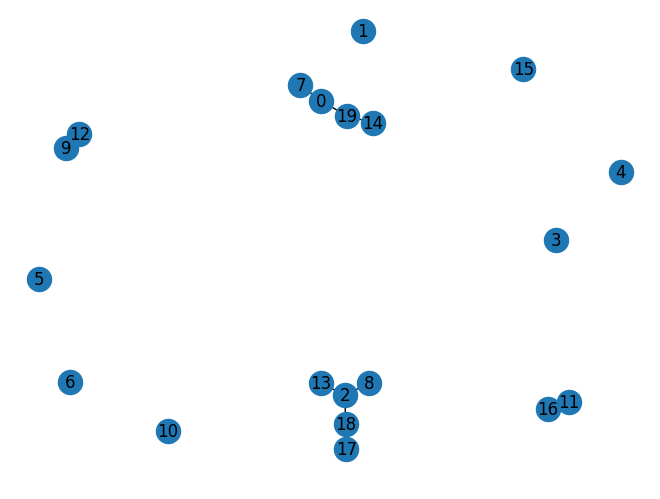

In [10]:
def part1(lines: list, c: int):
    G = nx.Graph()
    G.add_nodes_from(lines)
    
    d = {}
    node_list = G.nodes()
    l = len(node_list)
    
    for id1 in range(l):
        for id2 in range(id1+1, l):
            d[(id1, id2)] = linear_distance(id1, id2, G)
    
    keys = list(d.keys())
    values = list(d.values())
    val_sorted_index = np.argsort(values)
    
    i = 0
    while i < c:
        a, b = keys[val_sorted_index[i]]
        
        if no_circuit(a, b, G):
            G.add_edge(a, b)
            update_circuits(a, b, G)
            
        i += 1
    
    sizes = []
    for node in G.nodes():
        # print(node)
        l = len(G.nodes[node]['circuit'])
        # print(l)
        if l not in sizes:
            sizes.append(l)
    
    total = 1
    sizes.sort()
    for i in sizes[-3:]:
        total *= i
    
    print(f"Solution is {total}")

    return G

G = part1(lines1, 10)
print("See below for a little visualisation")
nx.draw(G, with_labels=True)

## Puzzle solution
---

In [11]:
_ = part1(lines2, 1000)

Solution is 32103


## Part 2:
Part 2 is quite similar, but the question now becomes in finding the minimum number of nodes that must be connected until all nodes are one big circuit i.e. the size of the circuit is equal to the number of nodes. The solution will be the multiple of the X co-ordinates of the last pair of connections that lead to a full big circuit.

We just have to edit our while loop stopping condition and change how we define our solution.

In [23]:
G = nx.Graph()
G.add_nodes_from(lines2)

d = {}
node_list = G.nodes()
l = len(node_list)

for id1 in range(l):
    for id2 in range(id1+1, l):
        d[(id1, id2)] = linear_distance(id1, id2)

keys = list(d.keys())
values = list(d.values())
val_sorted_index = np.argsort(values)

l = len(G.nodes())
i = 0
while len(G.nodes[0]['circuit']) !=  l:
    a, b = keys[val_sorted_index[i]]
    
    if no_circuit(a,b):
        G.add_edge(a,b)
        update_circuits(a,b)
    
    i += 1

solution = G.nodes[a]['cords'][0] * G.nodes[b]['cords'][0]

print(f"Solution is {solution}")

Solution is 8133642976
